In [36]:
import pandas as pd
import numpy as np
from modules import *
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk import word_tokenize
from konlpy.tag import Okt
from nltk.util import everygrams

In [37]:
df = pd.read_csv('전통주(종합).csv', encoding='utf-8-sig')
del df['Unnamed: 0']
del df['비고']
df = df.dropna()
df = df.reset_index(drop=True)
df

,이름,해시태그,종류,양조장 위치,도수,용량,가격,평점,맛,향,리뷰 수
0,감홍로,#계피 #고급스럽다 #명주,청주,경기도 파주시 파주읍 윗가마울길 149,40.0,400.0,45000.0,4.8,깔끔 은은 위스키 부드러움 호불호,계피 한약재,951.0
1,금설,#금가루 #젤리 #금,청주,경기도 파주시 파주읍 윗가마울길 149,35.0,375.0,35000.0,4.9,부드러움 진함 강함 구수함 깔끔함,인삼,1877.0
2,도원결의 15도,#복숭아 #은은하다 #단맛,증류주,경북 영덕군 강구면 소월1길 16-10,15.0,360.0,5500.0,4.8,상큼 은은 단맛,복숭아,2452.0
3,도원결의 25도,#복숭아 #은은하다 #시럽,증류주,경북 영덕군 강구면 소월1길 16-10,25.0,360.0,6310.0,4.8,상큼 은은 단맛,복숭아,549.0
4,도원결의 40도,#복숭아 #은은하다 #칵테일,증류주,경북 영덕군 강구면 소월1길 16-10,40.0,360.0,10930.0,4.8,상큼 은은 단맛,복숭아,199.0
5,박재서명인 안동소주 22도,#희다 #정종 #완벽하다,증류주,경북 안동시 풍산읍 산업단지6길 6,22.0,360.0,5000.0,4.85,깔끔 깨끗 부드러움,누룩,5212.0
6,박재서명인 안동소주 35도,#누룩 #희다 #서명,증류주,경북 안동시 풍산읍 산업단지6길 6,35.0,360.0,7500.0,4.85,세다 깔끔 깨끗 부드러움,누룩,4063.0
7,박재서명인 안동소주 45도,#고급스럽다 #상자 #분도,증류주,경북 안동시 풍산읍 산업단지6길 6,45.0,800.0,38000.0,4.83,세다 깔끔 깨끗 부드러움,누룩,14298.0
8,서울의밤 25도,#매실 #은은하다 #레몬,증류주,서울시 은평구 증산로7길 28-13,25.0,375.0,7110.0,4.84,부드러움 깔끔 단맛 강함,매실 자두,7496.0
9,안동소주 일품 21도,#은은하다 #깔다 #뒷맛,증류주,경상북도 안동시 풍산읍 ㈜ 안동소주일품,21.0,350.0,5280.0,4.84,부드러움 깔끔함 은은함 순함,곡물향,1880.0


In [38]:
# dtype 변환
df['도수'] = pd.to_numeric(df['도수'])

In [39]:
df.dtypes

이름         object
해시태그       object
종류         object
양조장 위치     object
도수        float64
용량        float64
가격        float64
평점         object
맛          object
향          object
리뷰 수      float64
dtype: object

In [40]:
# 과일향(복숭아, 포도, 머루, 매실)
# 새콤한(상큼, 요거트)
# 고소한(우유, 누룩, 막걸리)
# 달콤한(꿀향, 꿀, 단맛, 달달, 달콤하다)
# 쌉싸름한(계피, 인삼)
# 깔끔한(순하다)
# 부드러운(부드럽다, 은은하다)
# 진한(걸쭉한, 진하다)
# 가벼운(가볍다)
# 탄산있는(탄산, 스파클링)
# 분위기있는(와인, 고급스럽다, 샴페인)
# 도수낮은(10도 이하)
# 도수높은(10도 이상)

In [41]:
fruit = ['복숭아', '포도', '머루', '매실','레몬','복분자']
acidulous = ['상큼', '요거트']
savory = ['우유', '누룩', '막걸리']
sweet = ['꿀향','꿀맛', '꿀', '단맛', '달달', '달콤하다','시럽','칵테일','음료수']
bitter = ['계피', '인삼','약주']
clean = ['희다','위스키','깔끔','깔끔하다','사케','깨끗하다']
soft = ['부드럽다', '은은하다','부드러움']
thick = ['걸쭉한', '진하다']
light = ['가볍다','순하다','샴페인']
dry = ['드라이']
sparkling = ['탄산', '스파클링']
mood = ['와인', '고급스럽다', '명주','금','금가루']
low_alcohol_level = [df.loc[df['도수']<=10]]
# ['fruit','acidulous','savory','sweet','bitter','clean','soft','thick','light','sparkling','mood','low_alcohol_level']
# ['복숭아', '포도', '머루', '매실','상큼', '요거트','우유', '누룩', '막걸리','꿀향', '꿀', '단맛', '달달', '달콤하다','계피', '인삼','순하다','부드럽다', '은은하다','걸쭉한', '진하다','가볍다','탄산', '스파클링','와인', '고급스럽다', '샴페인']

In [42]:
df2 = pd.DataFrame(columns=['fruit','taste','body','sparkling','low_alcohol_level'])
df3 = pd.concat([df.iloc[:,:3],df['맛'],df['향'],df['도수'],df2], axis=1)
df3.head(3)

,이름,해시태그,종류,맛,향,도수,fruit,taste,body,sparkling,low_alcohol_level
0,감홍로,#계피 #고급스럽다 #명주,청주,깔끔 은은 위스키 부드러움 호불호,계피 한약재,40.0,NaN,NaN,NaN,NaN,NaN
1,금설,#금가루 #젤리 #금,청주,부드러움 진함 강함 구수함 깔끔함,인삼,35.0,NaN,NaN,NaN,NaN,NaN
2,도원결의 15도,#복숭아 #은은하다 #단맛,증류주,상큼 은은 단맛,복숭아,15.0,NaN,NaN,NaN,NaN,NaN


In [43]:
df3.해시태그 = df3.해시태그.str.replace("#","")
for i in range(len(df3.이름)):
    for j in df3.해시태그[i].split():
        if(j in fruit):
            df3.fruit[i] = j
        elif(j in acidulous):
            df3.taste[i] = '새콤한'
        elif(j in savory):
            df3.taste[i] = '고소한'
        elif(j in sweet):
            df3.taste[i] = '달콤한'
        elif(j in bitter):
            df3.taste[i] = '쌉싸름한'
        elif(j in clean):
            df3.taste[i] = '깔끔한'
        elif(j in soft):
            df3.body[i] = '부드러운'
        elif(j in thick):
            df3.body[i] = '진한'
        elif(j in light):
            df3.body[i] = '가벼운'
        elif(j in sparkling):
            df3.sparkling[i] = '탄산'
        else:
            pass

    if(df['도수'][i]<=10):
        df3.low_alcohol_level[i] = 0
    else:
        df3.low_alcohol_level[i] = 1
df3

C:\Users\user\AppData\Local\Temp\ipykernel_25552\2805880569.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.taste[i] = '쌉싸름한'
C:\Users\user\AppData\Local\Temp\ipykernel_25552\2805880569.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.low_alcohol_level[i] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_25552\2805880569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fruit[i] = j
C:\Users\user\AppData\Local\Temp\

,이름,해시태그,종류,맛,향,도수,fruit,taste,body,sparkling,low_alcohol_level
0,감홍로,계피 고급스럽다 명주,청주,깔끔 은은 위스키 부드러움 호불호,계피 한약재,40.0,NaN,쌉싸름한,NaN,NaN,1
1,금설,금가루 젤리 금,청주,부드러움 진함 강함 구수함 깔끔함,인삼,35.0,NaN,NaN,NaN,NaN,1
2,도원결의 15도,복숭아 은은하다 단맛,증류주,상큼 은은 단맛,복숭아,15.0,복숭아,달콤한,부드러운,NaN,1
3,도원결의 25도,복숭아 은은하다 시럽,증류주,상큼 은은 단맛,복숭아,25.0,복숭아,달콤한,부드러운,NaN,1
4,도원결의 40도,복숭아 은은하다 칵테일,증류주,상큼 은은 단맛,복숭아,40.0,복숭아,달콤한,부드러운,NaN,1
5,박재서명인 안동소주 22도,희다 정종 완벽하다,증류주,깔끔 깨끗 부드러움,누룩,22.0,NaN,깔끔한,NaN,NaN,1
6,박재서명인 안동소주 35도,누룩 희다 서명,증류주,세다 깔끔 깨끗 부드러움,누룩,35.0,NaN,깔끔한,NaN,NaN,1
7,박재서명인 안동소주 45도,고급스럽다 상자 분도,증류주,세다 깔끔 깨끗 부드러움,누룩,45.0,NaN,NaN,NaN,NaN,1
8,서울의밤 25도,매실 은은하다 레몬,증류주,부드러움 깔끔 단맛 강함,매실 자두,25.0,레몬,NaN,부드러운,NaN,1
9,안동소주 일품 21도,은은하다 깔다 뒷맛,증류주,부드러움 깔끔함 은은함 순함,곡물향,21.0,NaN,NaN,부드러운,NaN,1


In [44]:
df3.fruit = df3.fruit.fillna('과일향 없음')
df3.taste = df3.taste.fillna('기본적인')
df3.body = df3.body.fillna('중간')
df3.sparkling = df3.sparkling.fillna('탄산 없음')

In [45]:
df3['평가'] = ['과일향 없고 쌉싸름하고 탄산없는 술',
'과일향 없고 부드럽고 탄산없는 술',
'과일향 있고 달콤하고 부드럽고 탄산없는 술',
'과일향 있고 달콤하고 부드럽고 탄산없는 술',
'과일향 있고 달콤하고 부드럽고 탄산없는 술',
'과일향 없고 깔끔하고 탄산없는 술',
'과일향 없고 깔끔하고 탄산없는 술',
'과일향 없고 부드럽고 탄산없는 술',
'과일향 있고 달콤하고 부드럽고 탄산없는 술',
'과일향 없고 부드럽고 탄산없는 술',
'과일향 없고 깔끔하고 탄산없는 술',
'과일향 없고 쌉싸름하고 탄산없는 술',
'과일향 없고 쌉싸름하고 탄산없는 술',
'과일향 없고 부드럽고 탄산없는 술',
'과일향 없고 달콤하고 탄산없는 술',
'과일향 없고 가볍고 탄산있는 술',
'과일향 없고 달콤하고 가볍고 탄산없는 술',
'과일향 없고 달콤하고 탄산없는 술',
'과일향 없고 달콤하고 진하고 탄산없는 술',
'과일향 있고 달콤하고 부드럽고 탄산없는 술',
'과일향 있고 진하고 탄산없는 술',
'과일향 있고 탄산있는 술',
'과일향 있고 달콤하고 부드럽고 탄산없는 술'
]
df3.head(3)

,이름,해시태그,종류,맛,향,도수,fruit,taste,body,sparkling,low_alcohol_level,평가
0,감홍로,계피 고급스럽다 명주,청주,깔끔 은은 위스키 부드러움 호불호,계피 한약재,40.0,과일향 없음,쌉싸름한,중간,탄산 없음,1,과일향 없고 쌉싸름하고 탄산없는 술
1,금설,금가루 젤리 금,청주,부드러움 진함 강함 구수함 깔끔함,인삼,35.0,과일향 없음,기본적인,중간,탄산 없음,1,과일향 없고 부드럽고 탄산없는 술
2,도원결의 15도,복숭아 은은하다 단맛,증류주,상큼 은은 단맛,복숭아,15.0,복숭아,달콤한,부드러운,탄산 없음,1,과일향 있고 달콤하고 부드럽고 탄산없는 술


In [46]:
# df3['평가'] = ['한약재 향과 계피의 쌉싸름한 맛이 나며 탄산은 없고 바디감은 중간정도인 청주',
# '인삼 향과 깔끔한 맛과 바디감을 가지고 있으며 탄산이 없다',
# '복숭아 향과 달콤한 맛을 가지고 있고 부드러운 바디감을 가지고 있는 증류주',
# '복숭아 향과 상큼한 맛을 가지고 있고 바디감이 부드럽다',
# '달콤한 칵테일 같은 맛과 복숭아 향을 가지고 있고 부드럽다',
# '누룩 향이 나고 깔끔하고 중간 느낌의 바디감을 가지고 있고 탄산은 없다',
# '누룩 향이 나고 깔끔한 느낌에 적절한 바디감을 가지고 있고 탄산은 없다',
# '누룩 향이 나고 깔끔한 느낌에 기본적인 바디감을 가지고 있고 고급스럽다',
# '매실과 레몬 향을 가지고 있고 부드러우며 맛은 기본적인 증류주',
# '곡물향이 나며 탄산이 없고 부드러운 술',
# '곡물향이 나며 탄산이 없고 깔끔하고 부드러운 술',
# '달고 쌉싸름한 맛에 은은하게 누룩향이 나며 탄산은 없다',
# '약초 향과 약재 같은 맛이 나고 바디감은 중간정도이다',
# '달고 깔끔한 맛에 산미가 있고 과일향이 있으며 탄산은 없다',
# '드라이하고 누룩향이 나지만 달달하고 바디감은 중간 정도이다',
# '청포도 향에 스파클링 와인같은 느낌에 가벼운 바디감을 가지고 있는 막걸리',
# '요구르트 향과 우유같이 부드럽고 달콤한 가볍게 마실 수 있는 술',
# '꿀 향과 맛이 나며 달콤하고 중간 정도의 바디감과 탄산은 없는 막걸리',
# '바디감이 진하며 계피 향이 나고 달고 순해 음료수같은 술',
# '은은한 복숭아 향에 달달하고 깔끔한 과실주',
# '진한 머루향에 단맛이 있고 바디감은 진한 술',
# '복분자 향과 맛이 나며 도수가 높지 않고 탄산이 있는 과실주',
# '포도 향이 나며 달콤하고 부드러운 목넘김이 있다']
# df3.head(3)

### 결정트리

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from subprocess import check_call
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
import pydotplus 
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [48]:
encoder = LabelEncoder()
a = ['fruit', 'taste', 'body','sparkling','평가']
for i in range(len(a)):
    df3[a[i]+'_encoder'] = encoder.fit_transform(df3[a[i]])
    print(df3[a[i]+'_encoder'])
    print(encoder.classes_)
# y 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 (중요!!!)
# for label in np.unique(y):
#     if label not in encoder.classes_:
#         encoder.classes_ = np.append(encoder.classes_, label) #미처리 시 ValueError발생
# y_encoded = encoder.transform(y)

0     0
1     0
2     4
3     4
4     4
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    4
20    2
21    3
22    5
Name: fruit_encoder, dtype: int32
['과일향 없음' '레몬' '머루' '복분자' '복숭아' '포도']
0     3
1     0
2     2
3     2
4     2
5     1
6     1
7     0
8     0
9     0
10    1
11    3
12    3
13    0
14    2
15    0
16    2
17    2
18    2
19    2
20    0
21    0
22    2
Name: taste_encoder, dtype: int32
['기본적인' '깔끔한' '달콤한' '쌉싸름한']
0     2
1     2
2     1
3     1
4     1
5     2
6     2
7     2
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    0
16    0
17    2
18    3
19    2
20    3
21    2
22    2
Name: body_encoder, dtype: int32
['가벼운' '부드러운' '중간' '진한']
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    1
17    1
18    1
19    1
20    1
21    0
22    1
Name: sparkling_encoder, dtype: int32
['탄산' '탄산 없음']
0     6
1     5
2  

In [49]:
df3.head(3)

,이름,해시태그,종류,맛,향,도수,fruit,taste,body,sparkling,low_alcohol_level,평가,fruit_encoder,taste_encoder,body_encoder,sparkling_encoder,평가_encoder
0,감홍로,계피 고급스럽다 명주,청주,깔끔 은은 위스키 부드러움 호불호,계피 한약재,40.0,과일향 없음,쌉싸름한,중간,탄산 없음,1,과일향 없고 쌉싸름하고 탄산없는 술,0,3,2,1,6
1,금설,금가루 젤리 금,청주,부드러움 진함 강함 구수함 깔끔함,인삼,35.0,과일향 없음,기본적인,중간,탄산 없음,1,과일향 없고 부드럽고 탄산없는 술,0,0,2,1,5
2,도원결의 15도,복숭아 은은하다 단맛,증류주,상큼 은은 단맛,복숭아,15.0,복숭아,달콤한,부드러운,탄산 없음,1,과일향 있고 달콤하고 부드럽고 탄산없는 술,4,2,1,1,7


In [51]:
df_X = df3[['fruit_encoder','taste_encoder','body_encoder','sparkling_encoder']]
df_y = df3['평가_encoder']

In [53]:
# 문자열을 레이블 인코딩

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['fruit_encoder','taste_encoder','body_encoder','sparkling_encoder']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

df_X = encode_features(df_X)
df_X

C:\Users\user\AppData\Local\Temp\ipykernel_25552\4155261572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDF[feature] = le.transform(dataDF[feature])


,fruit_encoder,taste_encoder,body_encoder,sparkling_encoder
0,0,3,2,1
1,0,0,2,1
2,4,2,1,1
3,4,2,1,1
4,4,2,1,1
5,0,1,2,1
6,0,1,2,1
7,0,0,2,1
8,1,0,1,1
9,0,0,1,1


In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.2, random_state=11)

In [56]:
# classifier 객체 생성

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=1000)

In [57]:
# decision tree 학습과 예측
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

print('Decision Tree Classifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))


# random forest 학습과 예측

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)

print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))


# logistic regression 학습과 예측

lr_clf.fit(X_train,y_train)
lr_pred = rf_clf.predict(X_test)

print('LogisicRegressionClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

Decision Tree Classifier 정확도:0.6000
RandomForestClassifier 정확도:0.6000
LogisicRegressionClassifier 정확도:0.6000


In [58]:
# 모형 성능 평가 confusion matrix

# Decision Tree Classifier

from sklearn import metrics

dt_matrix = metrics.confusion_matrix(y_test,dt_pred)
print(dt_matrix)

dt_report = metrics.classification_report(y_test,dt_pred)
print(dt_report)

[[0 0 1 0 0]
 [0 2 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           7       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.30      0.40      0.33         5
weighted avg       0.50      0.60      0.53         5



c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [59]:
# RandomForestClassifier

rf_matrix = metrics.confusion_matrix(y_test,rf_pred)
print(rf_matrix)

rf_report = metrics.classification_report(y_test,rf_pred)
print(rf_report)

[[0 0 1 0 0]
 [0 2 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           7       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.30      0.40      0.33         5
weighted avg       0.50      0.60      0.53         5



c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [60]:
# LogisicRegressionClassifier

lr_matrix = metrics.confusion_matrix(y_test,lr_pred)
print(lr_matrix)

lr_report = metrics.classification_report(y_test,lr_pred)
print(lr_report)

[[0 0 1 0 0]
 [0 2 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           7       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.30      0.40      0.33         5
weighted avg       0.50      0.60      0.53         5



c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [69]:
# decision tree 교차 검증

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, df_X, df_y, cv=5)
for iter_count,accuracy in enumerate(scores):
    print('교차검증{0} 정확도: {1:.4f}'.format(iter_count,accuracy))
    
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차검증0 정확도: 0.8000
교차검증1 정확도: 0.8000
교차검증2 정확도: 0.6000
교차검증3 정확도: 0.7500
교차검증4 정확도: 0.7500
평균 정확도:0.7400


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [70]:
# random forest 교차 검증

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, df_X, df_y, cv=5)
for iter_count,accuracy in enumerate(scores):
    print('교차검증{0} 정확도: {1:.4f}'.format(iter_count,accuracy))
    
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


교차검증0 정확도: 0.8000
교차검증1 정확도: 0.8000
교차검증2 정확도: 0.6000
교차검증3 정확도: 0.7500
교차검증4 정확도: 0.7500
평균 정확도:0.7400


In [71]:
# logistic regression 교차 검증

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, df_X, df_y, cv=5)
for iter_count,accuracy in enumerate(scores):
    print('교차검증{0} 정확도: {1:.4f}'.format(iter_count,accuracy))
    
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차검증0 정확도: 0.6000
교차검증1 정확도: 0.6000
교차검증2 정확도: 0.4000
교차검증3 정확도: 0.5000
교차검증4 정확도: 0.5000
평균 정확도:0.5200


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


<AxesSubplot: >

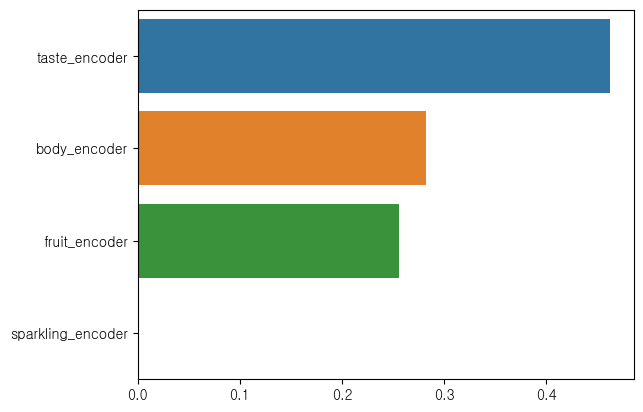

In [72]:
import seaborn as sns
%matplotlib inline

# decision tree 
feature_series = pd.Series(data=dt_clf.feature_importances_, index=df_X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

<AxesSubplot: >

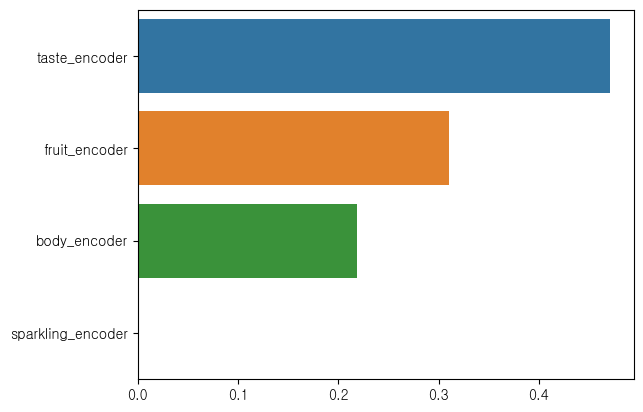

In [73]:
# random forest

feature_series = pd.Series(data=rf_clf.feature_importances_, index=df_X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [ ]:
# logistic regressions는 feature importance 없음

In [ ]:
# 조건 걸어서 분류